In [1]:
import h5py    
import numpy as np  
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist.axislines import Axes
from pathlib import Path
import seaborn as sns
import pandas as pd

In [2]:
color_met = '#FFA400'

In [3]:
# Data computed from the code ./Code4DataExtraction/Data4Figure2b.ipynb in this repository
# Data Folder can be downloaded from 10.5281/zenodo.14187063
df = pd.read_csv('./Data/fig2b_data.csv')

In [4]:
# Literature data (min and max intervals)
literature_data = {
    'ATP': [0.7, 2.59],   # [0.25, 2.59] Lehninger %Jolivet 2.2
    'ADP': [6.3e-3, 0.73], #Lehninger  % 6.3e−3 Calvetti
    'cai': [0.005, 5e-6], # 50–100 nMin AP 50 to 100 times higher (Berridge et al., 2000)5.e-5 mM % Jolivet 2015
    'cli': [3.73 ,7.0], # De Fazio 2000 %6 mM Cressman
    'Nai': [8, 20], # at rest [10-15] Jolivet 2015
    'Ki': [130, 150],
}

In [5]:
concentration_names = [ '$\mathrm{ATP}$', '$\mathrm{ADP}$', '$\mathrm{Ca}^2$', '$\mathrm{Cl}$', '$\mathrm{Na}$', '$\mathrm{K}$']
units = ['$(\mathrm{mM})$','$(\mathrm{mM})$','$(\mathrm{mM})$','$(\mathrm{mM})$','$(\mathrm{mM})$','$(\mathrm{mM})$','$(\mathrm{mM})$', '$(\mathrm{mM})$']

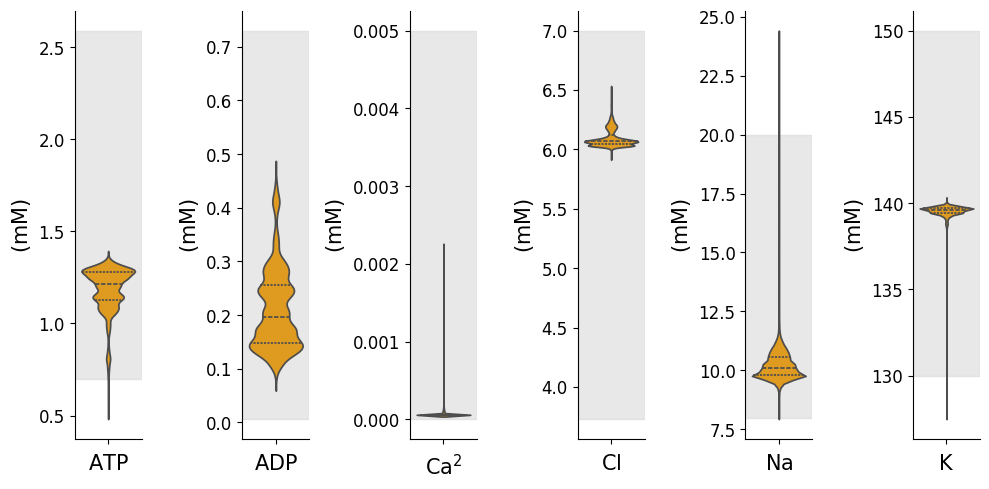

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axes for each concentration
fig, axes = plt.subplots(1, len(df.columns), figsize=(10, 5))

# Loop over each concentration and create individual plots
for i, concentration in enumerate(df.columns):
    
    # Get min and max from literature data
    lit_min, lit_max = literature_data[concentration]
    
    # Add a shaded region to represent literature interval
    axes[i].axhspan(lit_min, lit_max, color='lightgrey', alpha=0.5)
    
    # Create a violin plot for your data
    sns.violinplot(y=df[concentration], ax=axes[i], color=color_met, inner='quartile')
    
    # Add title and labels
    axes[i].set_xlabel(concentration_names[i], fontsize=15)
    
    axes[i].spines[['right', 'top']].set_visible(False)
    axes[i].spines[['right', 'top']].set_visible(False)

    axes[i].set_ylabel(units[i], rotation=90, fontsize=15)
    axes[i].tick_params(axis='both', labelsize=12)


    

# Tight layout for better spacing
plt.tight_layout()

resolution_value = 1200
#plt.savefig("./RESULTS/Figure2c.pdf", format="pdf", dpi=resolution_value, bbox_inches='tight')